In [39]:
## demo for linear regression
# y=wx+b, 

In [40]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt


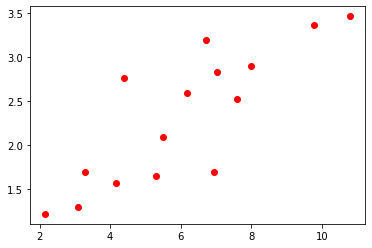

In [41]:
# training data
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168],
                    [9.779], [6.182], [7.59], [2.167], [7.042],
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)
y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573],
                    [3.366], [2.596], [2.53], [1.221], [2.827],
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

# plot data
plt.plot(x_train, y_train, 'ro')
plt.show()

# convert np.ndarray to torch.Tensor
x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train)

In [42]:
# linear regression model
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(1, 1)  # dimension of input and output is 1 dimension
        
    def forward(self, x):
        out = self.linear(x)
        return out
    
model = LinearRegression()

criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=1e-4)

In [43]:
from torch.autograd import Variable

# training
inputs = Variable(x_train)
target = Variable(y_train)
num_epochs = 1000
for epoch in range(num_epochs):
    # forward
    out = model(inputs)
    loss = criterion(out, target)
    # backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 20 == 0:
        print('[{}/{}], loss: {:.6f}'.format(epoch+1, num_epochs, loss.item()))

[20/1000], loss: 0.585048
[40/1000], loss: 0.512147
[60/1000], loss: 0.460574
[80/1000], loss: 0.424074
[100/1000], loss: 0.398228
[120/1000], loss: 0.379911
[140/1000], loss: 0.366916
[160/1000], loss: 0.357681
[180/1000], loss: 0.351104
[200/1000], loss: 0.346406
[220/1000], loss: 0.343036
[240/1000], loss: 0.340604
[260/1000], loss: 0.338835
[280/1000], loss: 0.337535
[300/1000], loss: 0.336567
[320/1000], loss: 0.335832
[340/1000], loss: 0.335264
[360/1000], loss: 0.334812
[380/1000], loss: 0.334443
[400/1000], loss: 0.334133
[420/1000], loss: 0.333864
[440/1000], loss: 0.333625
[460/1000], loss: 0.333406
[480/1000], loss: 0.333202
[500/1000], loss: 0.333009
[520/1000], loss: 0.332823
[540/1000], loss: 0.332642
[560/1000], loss: 0.332465
[580/1000], loss: 0.332291
[600/1000], loss: 0.332119
[620/1000], loss: 0.331949
[640/1000], loss: 0.331779
[660/1000], loss: 0.331610
[680/1000], loss: 0.331442
[700/1000], loss: 0.331275
[720/1000], loss: 0.331107
[740/1000], loss: 0.330940
[760/

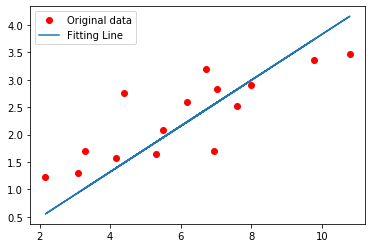

In [44]:
# test model
model.eval() # switch to test mode
with torch.no_grad():
    predict = model(inputs)
predict = predict.data.numpy()

# display result
plt.plot(x_train.numpy(), y_train.numpy(), 'ro', label='Original data')
plt.plot(x_train.numpy(), predict, label='Fitting Line')
plt.legend() 
plt.show()